## 결정 트리

### 결정 트리란?
- 예/아니오로 답할 수 있는 어떤 질문들이 있고, 그 질문들의 답을 따라가면서 데이터를 분류하는 알고리즘
- root 노드 : 제일 위에 있는 질문 노드
- leaf 노드 : 트리의 가장 끝에 있는 노드 (특정 예측값을 갖고 있음)
    - 나머지 노드들은 예/아니오로 답할 수 있는 질문들을 갖고 있음

### 지니 불순도(gini impurity)
- 데이터 셋 안에 서로 다른 분류들이 얼마나 섞여있는지
- GI = 1 - 독감일확률^2 - 독감이아닐확률^2
- 지니불순도가 작을수록 데이터 셋이 순수하고, 클수록 데이터 셋이 불순하다.

### 분류 노드 평가
- 데이터가 불순할 때는 분류 노드로 만들면 성능이 좋지 않다
- 분류노드를 만들려고 하는 경우에 분류하려는 데이터 셋의 불순도를 계산하면 이 노드가 어느 정도의 데이터를 맞출 수 있는지를 한 눈에 알 수 있음

### 질문 노드 평가
- 이 질문이 얼마나 데이터를 잘 나누는지 수치로 표현할 수 있음(지니 불순도의 가중평균)
- 수치가 낮을수록 좋고, 높을수록 안 좋음

In [23]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

In [7]:
iris_data = load_iris()

print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [13]:
X = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
y = pd.DataFrame(iris_data.target, columns=['class'])

y

,class
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [15]:
model = DecisionTreeClassifier(max_depth=4)

In [18]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [19]:
model.predict(X_test)

array([1, 1, 2, 0, 2, 2, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2])

In [20]:
model.score(X_test, y_test)

0.8666666666666667

In [22]:
importances = model.feature_importances_

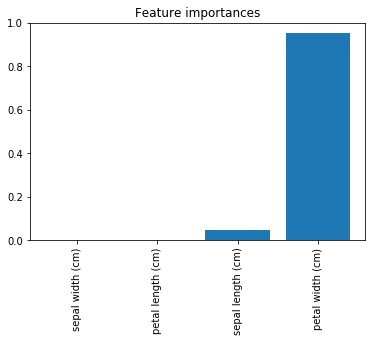

In [24]:
indices_sorted = np.argsort(importances)

plt.figure()
plt.title("Feature importances")
plt.bar(range(len(importances)), importances[indices_sorted])
plt.xticks(range(len(importances)), X.columns[indices_sorted], rotation=90)
plt.show()